In [25]:
# standard data manipulation
import pandas as pd

# geospatial data manipulation/visualization
import geopandas as gpd

# advanced graph visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# import rent burden csv file
df = pd.read_csv('data/rent_burden_ct_1.csv')

In [27]:
# obtain summary statistics for rent burden values
df.describe()

,Geo_FIPS,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden
count,2.498000e+03,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.00000,2498.000000
mean,6.037404e+09,719.328263,325.362690,83.418335,6.713771,91.768615,1.921537,146.548439,63.594876,211.889111,309.367894,4011.06285,0.527759
std,2.311478e+05,495.157153,323.090646,139.218466,13.118913,139.523622,10.423139,145.650734,64.435505,304.165094,252.803726,1470.99188,0.149498
min,6.037101e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.037209e+09,345.000000,117.000000,0.000000,0.000000,6.000000,0.000000,32.000000,15.250000,21.000000,104.000000,2993.25000,0.450224
50%,6.037403e+09,640.000000,225.500000,33.000000,0.000000,41.000000,0.000000,102.000000,49.000000,93.500000,250.500000,3933.00000,0.539045
75%,6.037552e+09,996.500000,426.000000,104.000000,9.000000,120.000000,0.000000,219.000000,92.000000,273.750000,474.750000,4954.00000,0.626999
max,6.037990e+09,4790.000000,3474.000000,1218.000000,108.000000,1442.000000,323.000000,816.000000,536.000000,3317.000000,1326.000000,13830.00000,1.000000


df.head()

df = df.rename(columns={'hispanic': 'hispanic_alone'})

df['Total_white']=df['white_alone'].sum()
df['white_proportion']=(df['white_alone']/df['Total_white'])*1000

df['Total_hispanic']=df['hispanic_alone'].sum()
df['hispanic_proportion']=(df['hispanic_alone']/df['Total_hispanic'])*1000

df['Total_black']=df['black_alone'].sum()
df['black_proportion']=(df['black_alone']/df['Total_black'])*1000

df.head()

In [35]:
def total_row_proportion(cols):
    for x in cols:
        df['x']=df['x'].sum()
races = ["black", "white", "hispanic"]     
total_row_proportion(races)

KeyError: 'x'

## reg with absolutes

The correlation between White Renter Households and Rent Burden is 0.03179379756714936
The correlation between Black Renter Households and Rent Burden is 0.14769047296906557
The correlation between Black Renter Households and Rent Burden is 0.26417136306594624


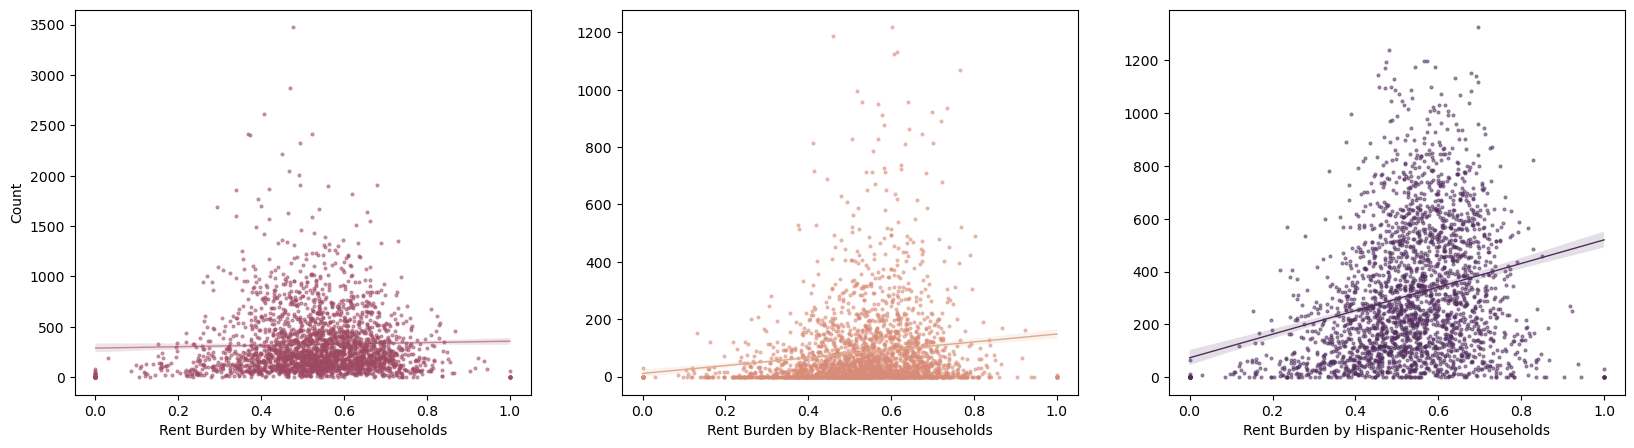

In [32]:
#lets take a look at the correlation between the race of renter-occupied households and the percentages of rent burden for the census tract

# set subplots
fig, axes = plt.subplots(1, 3, figsize = (20, 5))

# create regression plots
scatter1 = sns.regplot(ax = axes[0], data=df, x= 'rent_burden', y= 'white_alone', scatter_kws={"color": [158/255,73/255,99/255], "s": 4, "alpha" : .5 }, line_kws={'linewidth':1,'alpha':.6, "color": [158/255,73/255,99/255]})
scatter2 = sns.regplot(ax = axes[1], data=df, x= 'rent_burden', y= 'black_alone', scatter_kws={"color": [216/255,139/255,118/255], "s": 4, "alpha" : .5}, line_kws={'linewidth':1,'alpha':1, "color": [222/255,170/255,137/255]})
scatter3 = sns.regplot(ax = axes[2], data=df, x= 'rent_burden', y= 'hispanic_alone', scatter_kws={"color": [80/255,45/255,93/255], "s": 4, "alpha" : .5}, line_kws={'linewidth':1,'alpha':1, "color": [80/255,45/255,93/255]})

# change x-axis labels
axes[0].set(xlabel='Rent Burden by White-Renter Households', ylabel = 'Count')
axes[1].set(xlabel='Rent Burden by Black-Renter Households', ylabel = ' ')
axes[2].set(xlabel='Rent Burden by Hispanic-Renter Households', ylabel = ' ')

# show correlation coefficients
from scipy.stats import pearsonr
print('The correlation between White Renter Households and Rent Burden is', pearsonr(df['white_alone'], df['rent_burden'])[0])
print('The correlation between Black Renter Households and Rent Burden is', pearsonr(df['black_alone'], df['rent_burden'])[0])
print('The correlation between Black Renter Households and Rent Burden is', pearsonr(df['hispanic_alone'], df['rent_burden'])[0])

## reg with proportion

The correlation between White Renter Households and Rent Burden is 0.03179379756714937
The correlation between Black Renter Households and Rent Burden is 0.14769047296906557
The correlation between Black Renter Households and Rent Burden is 0.26417136306594624


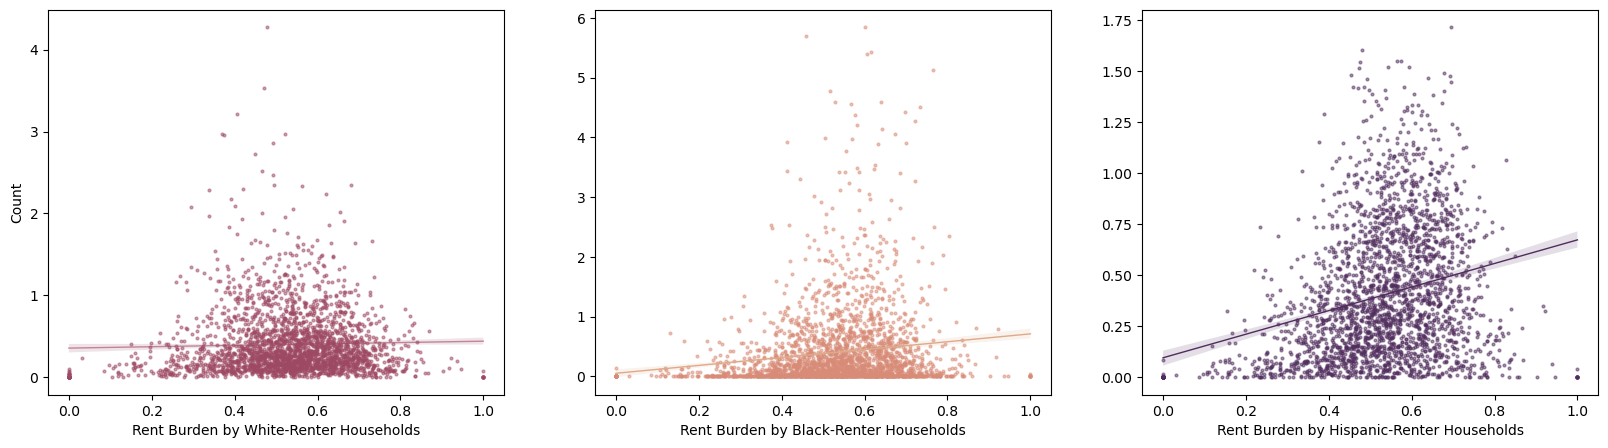

In [31]:
#lets take a look at the correlation between the race of renter-occupied households and the percentages of rent burden for the census tract

# set subplots
fig, axes = plt.subplots(1, 3, figsize = (20, 5))

# create regression plots
scatter1 = sns.regplot(ax = axes[0], data=df, x= 'rent_burden', y= 'white_proportion', scatter_kws={"color": [158/255,73/255,99/255], "s": 4, "alpha" : .5 }, line_kws={'linewidth':1,'alpha':.6, "color": [158/255,73/255,99/255]})
scatter2 = sns.regplot(ax = axes[1], data=df, x= 'rent_burden', y= 'black_proportion', scatter_kws={"color": [216/255,139/255,118/255], "s": 4, "alpha" : .5}, line_kws={'linewidth':1,'alpha':1, "color": [222/255,170/255,137/255]})
scatter3 = sns.regplot(ax = axes[2], data=df, x= 'rent_burden', y= 'hispanic_proportion', scatter_kws={"color": [80/255,45/255,93/255], "s": 4, "alpha" : .5}, line_kws={'linewidth':1,'alpha':1, "color": [80/255,45/255,93/255]})

# change x-axis labels
axes[0].set(xlabel='Rent Burden by White-Renter Households', ylabel = 'Count')
axes[1].set(xlabel='Rent Burden by Black-Renter Households', ylabel = ' ')
axes[2].set(xlabel='Rent Burden by Hispanic-Renter Households', ylabel = ' ')

# show correlation coefficients
from scipy.stats import pearsonr
print('The correlation between White Renter Households and Rent Burden is', pearsonr(df['white_proportion'], df['rent_burden'])[0])
print('The correlation between Black Renter Households and Rent Burden is', pearsonr(df['black_proportion'], df['rent_burden'])[0])
print('The correlation between Black Renter Households and Rent Burden is', pearsonr(df['hispanic_proportion'], df['rent_burden'])[0])